## CAP 394: Introdução a Data Science

### Análise preliminar de dados de poços para a caracterização de aquíferos

Ana Carolina Calderaro - 142727

## Introdução

<div style="text-align: justify"> Este trabalho refere-se a análise de dados de poços destinados ao uso e captação de recursos hídricos, distribuidos pelo Instituto Estadual do Ambiente (INEA), no Rio de Janeiro. O objetivo é fazer uma análise preliminar dos dados para auxiliar na caracterização de aquíferos, bem como verificar a disponibilidade e confiabilidade dos dados. Foram analisados aqui dados de poços do estado do Rio de Janeiro.</div>

### 1ª Etapa - Seleção das variáveis

<div style="text-align: justify"> Nessa primeira etapa, foi verificado como se apresentavam as três tabelas com os dados (Figura 1). Para esse trabalho, as variáveis mais relevantes foram a vazão (m3/h) e a profundidade (m). Entretanto, elas não eram comuns a todos, principalmente a profundidade. Como resultado, gerou-se uma tabela com as vazões e profundidade da maioria dos poços, bem como a localização (em UTM) de cada um. Esses valores foram copiados para uma outra planilha e formatados todos no mesmo padrão, resultando em uma planilha com quatro colunas e 1548 linhas (Figura 2).</div>

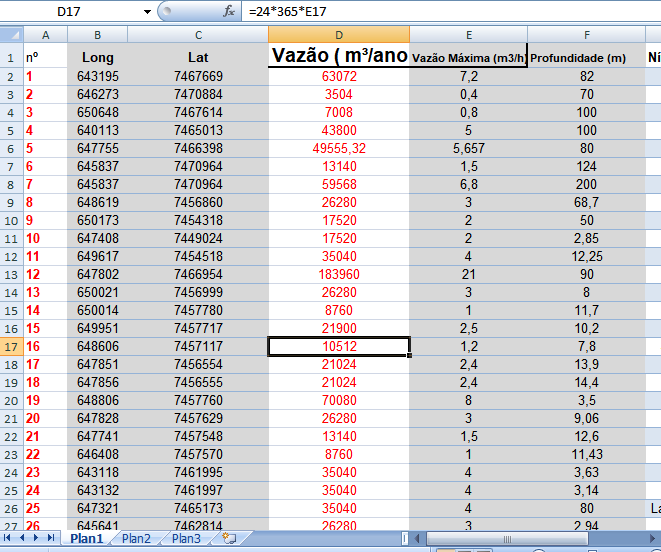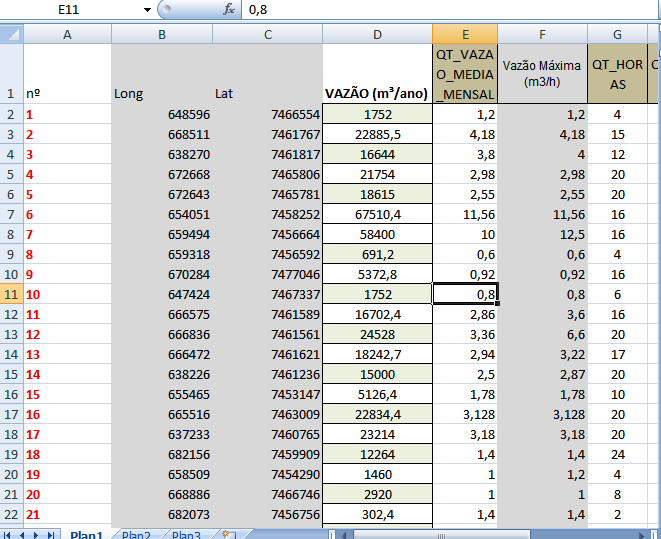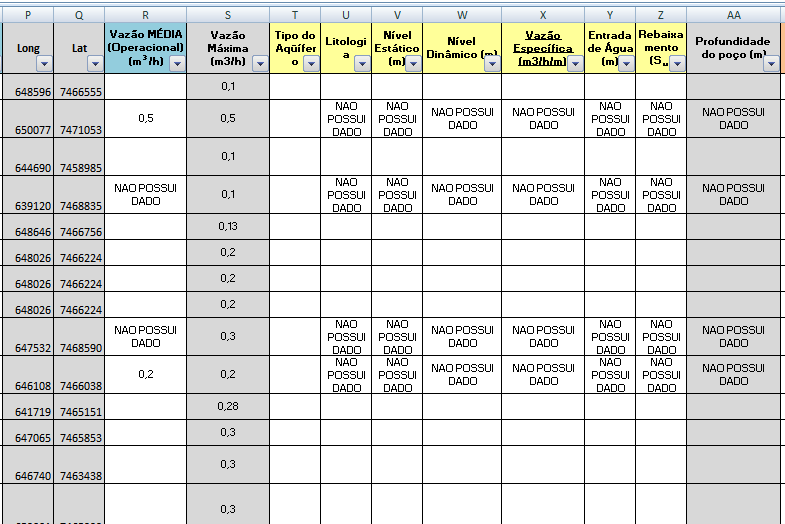 
<div style="text-align: center">Figura 1: Tabelas com dados. As variáveis selecionadas estão preenchidas por cinza.</div>

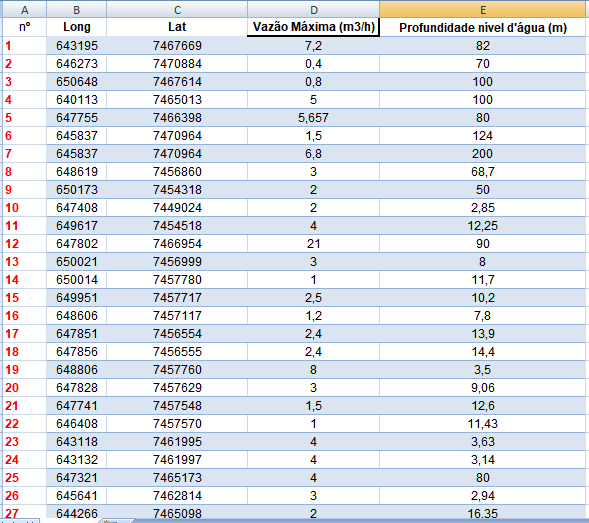
<div style="text-align: center"> Figura 2: Resultado em mesmo formato da seleção das variáveis</div>

### 2ª Etapa  - Limpeza dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# carregando a planilha de excel
file = r"C:\Users\Pessoal\Desktop\dados\pocos.xlsx"
xl = pd.ExcelFile(file)
#transformando a coluna em um dataframe
df1 = xl.parse('pocos')
df1

nº    Long      Lat  Vazão Máxima (m3/h)  \
0      1.0  643195  7467669                7.200   
1      2.0  646273  7470884                0.400   
2      3.0  650648  7467614                0.800   
3      4.0  640113  7465013                5.000   
4      5.0  647755  7466398                5.657   
5      6.0  645837  7470964                1.500   
6      7.0  645837  7470964                6.800   
7      8.0  648619  7456860                3.000   
8      9.0  650173  7454318                2.000   
9     10.0  647408  7449024                2.000   
10    11.0  649617  7454518                4.000   
11    12.0  647802  7466954               21.000   
12    13.0  650021  7456999                3.000   
13    14.0  650014  7457780                1.000   
14    15.0  649951  7457717                2.500   
15    16.0  648606  7457117                1.200   
16    17.0  647851  7456554                2.400   
17    18.0  647856  7456555                2.400   
18    19.0  648806  7457760                8.000   
19    20.0  647828  7457629                3.000   
20    21.0  647741  7457548                1.500   
21    22.0  646408  7457570                1.000   
22    23.0  643118  7461995                4.000   
23    24.0  643132  7461997                4.000   
24    25.0  647321  7465173                4.000   
25    26.0  645641  7462814                3.000   
26    27.0  644266  7465098                2.000   
27    28.0  646707  7468637               30.000   
28    29.0  648598  7457302               15.000   
29    30.0  645614  7456858                1.000   
...    ...     ...      ...                  ...   
1517   NaN  642455  7460486               10.600   
1518   NaN  650230  7457790               13.550   
1519   NaN  650213  7457814               17.660   
1520   NaN  646966  7470962                  NaN   
1521   NaN  650786  7464970                  NaN   
1522   NaN  650782  7464921                  NaN   
1523   NaN  648819  7468622                  NaN   
1524   NaN  645854  7470890                3.800   
1525   NaN  649485  7471428               92.290   
1526   NaN  649404  7471432                2.330   
1527   NaN  646896  7466063                1.000   
1528   NaN  645845  7467368                0.800   
1529   NaN  642857  7461244               40.000   
1530   NaN  647142  7467048                1.380   
1531   NaN  652265  7464450                1.000   
1532   NaN  652265  7464450                3.500   
1533   NaN  646104  7463235                0.480   
1534   NaN  640607  7469205                4.260   
1535   NaN  648071  7457485                1.000   
1536   NaN  647119  7471314                1.400   
1537   NaN  646740  7463438                0.300   
1538   NaN  640405  7468865                1.000   
1539   NaN  648777  7456361                3.600   
1540   NaN  636633  7464342                1.500   
1541   NaN  648712  7471111               27.692   
1542   NaN  639229  7459409                4.200   
1543   NaN  645734  7462958                0.390   
1544   NaN  647106  7464262                3.180   
1545   NaN  648304  7463782                1.000   
1546   NaN  649452  7470972                0.500   

      Profundidade nível d'água (m)  
0                             82.00  
1                             70.00  
2                            100.00  
3                            100.00  
4                             80.00  
5                            124.00  
6                            200.00  
7                             68.70  
8                             50.00  
9                              2.85  
10                            12.25  
11                            90.00  
12                             8.00  
13                            11.70  
14                            10.20  
15                             7.80  
16                            13.90  
17                            14.40  
18                             3.50  
19                     

In [43]:
#Renomeando as colunas da tabela
df1.rename(columns={"Long": "easting", "Lat": "northing", "Vazão Máxima (m3/h)": "max_flow","Profundidade nível d'água (m)": "depth"}, inplace=True)
#para excluir a coluna "nº"
df2=df1.drop(["nº"], axis=1) #essa é a minha tabela original com todos os dados
df2

easting  northing  max_flow   depth
0      643195   7467669     7.200   82.00
1      646273   7470884     0.400   70.00
2      650648   7467614     0.800  100.00
3      640113   7465013     5.000  100.00
4      647755   7466398     5.657   80.00
5      645837   7470964     1.500  124.00
6      645837   7470964     6.800  200.00
7      648619   7456860     3.000   68.70
8      650173   7454318     2.000   50.00
9      647408   7449024     2.000    2.85
10     649617   7454518     4.000   12.25
11     647802   7466954    21.000   90.00
12     650021   7456999     3.000    8.00
13     650014   7457780     1.000   11.70
14     649951   7457717     2.500   10.20
15     648606   7457117     1.200    7.80
16     647851   7456554     2.400   13.90
17     647856   7456555     2.400   14.40
18     648806   7457760     8.000    3.50
19     647828   7457629     3.000    9.06
20     647741   7457548     1.500   12.60
21     646408   7457570     1.000   11.43
22     643118   7461995     4.000    3.63
23     643132   7461997     4.000    3.14
24     647321   7465173     4.000   80.00
25     645641   7462814     3.000    2.94
26     644266   7465098     2.000   16.35
27     646707   7468637    30.000   80.00
28     648598   7457302    15.000   55.00
29     645614   7456858     1.000    7.00
...       ...       ...       ...     ...
1517   642455   7460486    10.600  300.00
1518   650230   7457790    13.550   60.00
1519   650213   7457814    17.660   70.00
1520   646966   7470962       NaN   80.00
1521   650786   7464970       NaN   36.00
1522   650782   7464921       NaN   50.00
1523   648819   7468622       NaN     NaN
1524   645854   7470890     3.800  110.00
1525   649485   7471428    92.290   48.00
1526   649404   7471432     2.330   64.00
1527   646896   7466063     1.000     NaN
1528   645845   7467368     0.800     NaN
1529   642857   7461244    40.000  138.00
1530   647142   7467048     1.380     NaN
1531   652265   7464450     1.000     NaN
1532   652265   7464450     3.500     NaN
1533   646104   7463235     0.480     NaN
1534   640607   7469205     4.260   88.00
1535   648071   7457485     1.000     NaN
1536   647119   7471314     1.400     NaN
1537   646740   7463438     0.300     NaN
1538   640405   7468865     1.000     NaN
1539   648777   7456361     3.600     NaN
1540   636633   7464342     1.500     NaN
1541   648712   7471111    27.692     NaN
1542   639229   7459409     4.200     NaN
1543   645734   7462958     0.390     NaN
1544   647106   7464262     3.180     NaN
1545   648304   7463782     1.000     NaN
1546   649452   7470972     0.500     NaN

[1547 rows x 4 columns]

In [44]:
#Primeiro preciso excluir a coluna profundidade (depth) para analisar somente a vazão
df3=df2.drop(["depth"], axis=1)
df4=df3.dropna(subset=["max_flow"])
df4

easting  northing  max_flow
0      643195   7467669     7.200
1      646273   7470884     0.400
2      650648   7467614     0.800
3      640113   7465013     5.000
4      647755   7466398     5.657
5      645837   7470964     1.500
6      645837   7470964     6.800
7      648619   7456860     3.000
8      650173   7454318     2.000
9      647408   7449024     2.000
10     649617   7454518     4.000
11     647802   7466954    21.000
12     650021   7456999     3.000
13     650014   7457780     1.000
14     649951   7457717     2.500
15     648606   7457117     1.200
16     647851   7456554     2.400
17     647856   7456555     2.400
18     648806   7457760     8.000
19     647828   7457629     3.000
20     647741   7457548     1.500
21     646408   7457570     1.000
22     643118   7461995     4.000
23     643132   7461997     4.000
24     647321   7465173     4.000
25     645641   7462814     3.000
26     644266   7465098     2.000
27     646707   7468637    30.000
28     648598   7457302    15.000
29     645614   7456858     1.000
...       ...       ...       ...
1501   640152   7464937     3.870
1502   648098   7466463     3.850
1506   638624   7460248     1.650
1507   638633   7460323     0.969
1517   642455   7460486    10.600
1518   650230   7457790    13.550
1519   650213   7457814    17.660
1524   645854   7470890     3.800
1525   649485   7471428    92.290
1526   649404   7471432     2.330
1527   646896   7466063     1.000
1528   645845   7467368     0.800
1529   642857   7461244    40.000
1530   647142   7467048     1.380
1531   652265   7464450     1.000
1532   652265   7464450     3.500
1533   646104   7463235     0.480
1534   640607   7469205     4.260
1535   648071   7457485     1.000
1536   647119   7471314     1.400
1537   646740   7463438     0.300
1538   640405   7468865     1.000
1539   648777   7456361     3.600
1540   636633   7464342     1.500
1541   648712   7471111    27.692
1542   639229   7459409     4.200
1543   645734   7462958     0.390
1544   647106   7464262     3.180
1545   648304   7463782     1.000
1546   649452   7470972     0.500

[1528 rows x 3 columns]

In [ ]:
#ou seja, há 1528 poços com dados de vazão

In [45]:
#Agora preciso excluir os dados que não contenham valores de vazão ou profundidade, baseado no tabela original
df5=df2.dropna(subset=["max_flow", "depth"])
df5

easting  northing  max_flow   depth
0      643195   7467669     7.200   82.00
1      646273   7470884     0.400   70.00
2      650648   7467614     0.800  100.00
3      640113   7465013     5.000  100.00
4      647755   7466398     5.657   80.00
5      645837   7470964     1.500  124.00
6      645837   7470964     6.800  200.00
7      648619   7456860     3.000   68.70
8      650173   7454318     2.000   50.00
9      647408   7449024     2.000    2.85
10     649617   7454518     4.000   12.25
11     647802   7466954    21.000   90.00
12     650021   7456999     3.000    8.00
13     650014   7457780     1.000   11.70
14     649951   7457717     2.500   10.20
15     648606   7457117     1.200    7.80
16     647851   7456554     2.400   13.90
17     647856   7456555     2.400   14.40
18     648806   7457760     8.000    3.50
19     647828   7457629     3.000    9.06
20     647741   7457548     1.500   12.60
21     646408   7457570     1.000   11.43
22     643118   7461995     4.000    3.63
23     643132   7461997     4.000    3.14
24     647321   7465173     4.000   80.00
25     645641   7462814     3.000    2.94
26     644266   7465098     2.000   16.35
27     646707   7468637    30.000   80.00
28     648598   7457302    15.000   55.00
29     645614   7456858     1.000    7.00
1408   647190   7465416     0.510   12.00
1442   649663   7471305     1.980   17.15
1447   647275   7471125     1.704   87.00
1454   648712   7471111    13.650  102.00
1459   643603   7466319     0.250   11.00
1478   646417   7471884     1.620  150.00
1479   645854   7470891     6.150  110.00
1480   646474   7458606     4.200   58.00
1481   646538   7458610     4.800   60.00
1482   648243   7470952     4.000   92.00
1485   650415   7467523     2.200   80.00
1486   650453   7467277     0.990  150.00
1487   645196   7466330     8.700   78.00
1488   646698   7470955     1.600   73.00
1489   648435   7470941     5.050   80.00
1492   646712   7466013     4.430  120.00
1493   651190   7464664    10.255  100.00
1495   646995   7466597     0.770    9.00
1496   641450   7469284     3.450   12.00
1497   641325   7469490     6.800   40.00
1501   640152   7464937     3.870   65.00
1502   648098   7466463     3.850   50.00
1517   642455   7460486    10.600  300.00
1518   650230   7457790    13.550   60.00
1519   650213   7457814    17.660   70.00
1524   645854   7470890     3.800  110.00
1525   649485   7471428    92.290   48.00
1526   649404   7471432     2.330   64.00
1529   642857   7461244    40.000  138.00
1534   640607   7469205     4.260   88.00

In [ ]:
#Após essa limpeza, os poços que possuem os valores de vazão e profundidade caem para 60.

In [29]:
#Exportando as duas planilhas com os dados limpos (somente vazão e vazão e profundidade) para arquivo csv para serem analisados
#em excel
df4.to_csv(r"C:\Users\Pessoal\Desktop\dados\pocosdf4.csv", index=False)
df5.to_csv(r"C:\Users\Pessoal\Desktop\dados\pocosdf5.csv", index=False)

### 3ª Análise Exploratória
<div style="text-align: justify">Realizando-se uma análise exploratória dos dados da planilha pocosdf5 (vazão x profundidade), foi possível verificar através de gráficos 
o seguinte: parece haver correlação entre valores de baixa profundidade e valores de baixa vazão; parece que as profundidades estão agrupadas próximas a 10m e a 100m, sendo que as profundidades de 100 m tem maior variabilidade de vazão.</div>

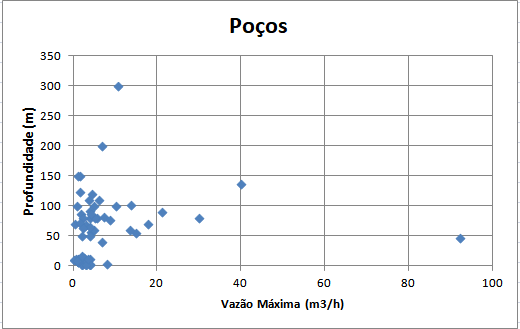
<div style="text-align: center">Figura 3: Scatter plot da vazão x profundidade</div>

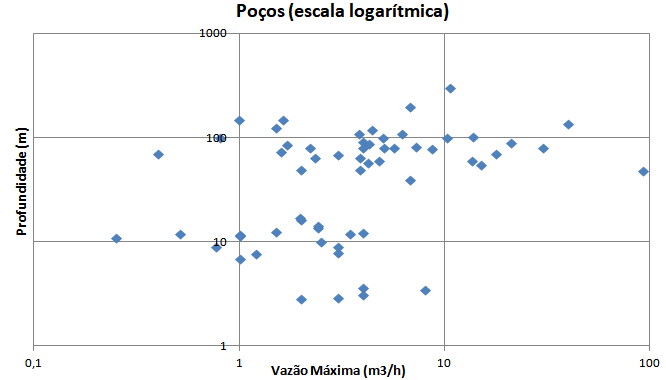
<div style="text-align: center">Figura 4: Scatter plot da vazão x profundidade (escala logarítmica)</div>

Realiza-se então uma regressão linear para verificar se existe uma correlação entre vazão e profundidade.

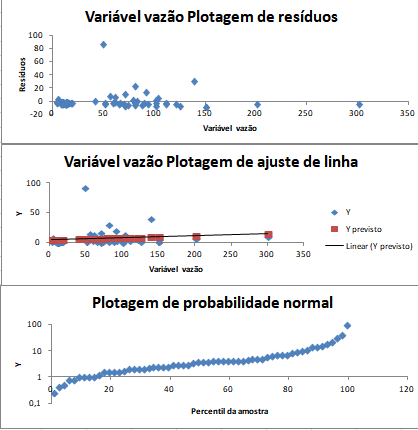
<div style="text-align: center">Figura 5: Resultados da regressão linear</div>

Estatística de regressão:
#R múltiplo	0,140322161
#R-Quadrado	0,019690309 (1,96%)
#R-quadrado ajustado	0,002788418
#Erro padrão	13,20050509
#Observações	60
#Valor-P 0,0595

<div style="text-align: justify"> Analisando o Valor-P que é de 0,0595 (>0,05), observa-se que a correlação entre as variáveis não é significativa. Observando o gráfico de resíduos (centro), pode-se notar que o Y previsto está muito distante do Y real, assim como o gráfico de probabilidade normal (abaixo) teve que ser modificado para uma curva exponencial. Em relação ao coeficiente de determinação R², o valor de 1,96% está muito abaixo de 100, mostrando que a variável x, ou seja, a vazão, tem muito pouco impacto sobre a profundidade. Conclui-se então então que não há correlação entre essas variáveis, logo a regressão linear não é eficaz para a análise desses dados.</div>

### Obs: 
Deve-se atentar que há poucos dados para uma realização adequada da regressão linear, entretanto esses são os únicos poços que possuem tanto vazão quanto profundidade.

### 4ª Etapa: Plotando os dados
<div style="text-align: justify"> Para plotar as coordenadas, inicialmente somente da vazão, foram transformadas as coordenadas em UTM para lat/long através do site http://www.hamstermap.com/. Para isso foi adicionada na tabela uma coluna da zona 23K correspondente ao da localização. Posteriormente, foram retiradas as colunas de easting e northing e substituídas pela latitude e longitude, os quais são lidas pelo software Orange.</div>

Para efeito de visualização e análise dos dados, as vazões foram classificadas de acordo com o que a Secretaria Estadual de Meio Ambiente e Recursos Hídricos estipula:

#produtividade alta (> 4 m³/h/m) --> granular

#média (2 a 4 m³/h/m) --> granular

#baixa (0,5 a 2 m³/h/m) --> fissural/cárstico

#muito baixa ( fissural/cárstico

In [48]:
# carregando a planilha de excel (todos as vazoes)
file1 = r"C:\Users\Pessoal\Desktop\dados\pocos_limpos4.xlsx"
xl1 = pd.ExcelFile(file1)
#transformando a coluna em um dataframe
vazao = xl1.parse('pocos_limpos4')
vazao

latitude  longitude  max_flow produtividade   tipo de aquifero
0    -23.004172 -43.319375    0.0001   muito baixa  fissural/carstico
1    -22.999308 -43.361947    0.0010   muito baixa  fissural/carstico
2    -23.000951 -43.376833    0.0010   muito baixa  fissural/carstico
3    -23.016187 -43.468469    0.0010   muito baixa  fissural/carstico
4    -23.016776 -43.482658    0.0100   muito baixa  fissural/carstico
5    -23.010584 -43.533841    0.0100   muito baixa  fissural/carstico
6    -23.014395 -43.521174    0.0100   muito baixa  fissural/carstico
7    -22.890369 -43.260895    0.0100   muito baixa  fissural/carstico
8    -22.951779 -43.347230    0.0100   muito baixa  fissural/carstico
9    -22.892694 -43.395192    0.0125   muito baixa  fissural/carstico
10   -23.031255 -43.558197    0.0400   muito baixa  fissural/carstico
11   -23.018477 -43.455018    0.0500   muito baixa  fissural/carstico
12   -22.833613 -43.383619    0.0500   muito baixa  fissural/carstico
13   -23.013432 -43.466490    0.0600   muito baixa  fissural/carstico
14   -22.989447 -43.301112    0.1000   muito baixa  fissural/carstico
15   -22.882609 -43.643746    0.1000   muito baixa  fissural/carstico
16   -22.997534 -43.402276    0.1000   muito baixa  fissural/carstico
17   -23.018683 -43.475270    0.1000   muito baixa  fissural/carstico
18   -23.018823 -43.475757    0.1000   muito baixa  fissural/carstico
19   -23.007739 -43.299908    0.1000   muito baixa  fissural/carstico
20   -22.946227 -43.355254    0.1000   muito baixa  fissural/carstico
21   -22.927959 -43.198155    0.1000   muito baixa  fissural/carstico
22   -22.877869 -43.362823    0.1000   muito baixa  fissural/carstico
23   -22.993680 -43.302581    0.1000   muito baixa  fissural/carstico
24   -22.902384 -43.551170    0.1000   muito baixa  fissural/carstico
25   -22.971089 -43.588536    0.1000   muito baixa  fissural/carstico
26   -22.882609 -43.643746    0.1000   muito baixa  fissural/carstico
27   -22.902384 -43.551170    0.1000   muito baixa  fissural/carstico
28   -22.865365 -43.600722    0.1000   muito baixa  fissural/carstico
29   -22.920656 -43.566225    0.1000   muito baixa  fissural/carstico
...         ...        ...       ...           ...                ...
1478 -22.997923 -43.267450   24.2000    muito alta           granular
1479 -22.976947 -43.495842   25.0000    muito alta           granular
1480 -22.988329 -43.482869   25.0000    muito alta           granular
1481 -22.988311 -43.482869   25.0000    muito alta           granular
1482 -22.860863 -43.571891   25.7000    muito alta           granular
1483 -22.879481 -43.645561   27.0000    muito alta           granular
1484 -22.879057 -43.645565   27.0000    muito alta           granular
1485 -22.910938 -43.515114   27.0000    muito alta           granular
1486 -22.910947 -43.515114   27.0000    muito alta           granular
1487 -22.861230 -43.550476   27.6920    muito alta           granular
1488 -22.861230 -43.550476   27.6920    muito alta           granular
1489 -22.960001 -43.287145   28.8000    muito alta           granular
1490 -22.883749 -43.569780   30.0000    muito alta           granular
1491 -22.857971 -43.550676   30.0000    muito alta           granular
1492 -22.857971 -43.550676   30.0000    muito alta           granular
1493 -22.928032 -43.508171   30.6000    muito alta           granular
1494 -22.937587 -43.378341   30.7830    muito alta           granular
1495 -22.960396 -43.539620   32.4000    muito alta           granular
1496 -22.957841 -43.277810   34.5600    muito alta           granular
1497 -22.970698 -43.265203   39.9600    muito alta           granular
1498 -22.859597 -43.550640   40.0000    muito alta           granular
1499 -22.950838 -43.606613   40.0000    muito alta           granular
1500 -22.859597 -43.550640   40.0000    muito alta           granular
1501 -22.950847 -43.606622   40.0000    muito alta           granular
1502 -22.955781 -43.533837   44.8200    muito alta           granular
1503 -22.958591 -

In [49]:
# carregando a planilha de excel (vazao x profundidade)
file3 = r"C:\Users\Pessoal\Desktop\dados\pocos_limpos.xlsx"
xl3 = pd.ExcelFile(file3)
#transformando a coluna em um dataframe
vazao_profun = xl3.parse('pocos_limpos')
vazao_profun

latitude  longitude  max_flow   depth produtividade  tipo de aquifero 
0  -22.904951 -43.599819     0.250   11.00   muito baixa  fissural/carstico
1  -22.863495 -43.574222     0.400   70.00   muito baixa  fissural/carstico
2  -22.912794 -43.564767     0.510   12.00         baixa  fissural/carstico
3  -22.902146 -43.566780     0.770    9.00         baixa  fissural/carstico
4  -22.892637 -43.531271     0.800  100.00         baixa  fissural/carstico
5  -22.895698 -43.533138     0.990  150.00         baixa  fissural/carstico
6  -22.981500 -43.536496     1.000   11.70         baixa  fissural/carstico
7  -22.983718 -43.571647     1.000   11.43         baixa  fissural/carstico
8  -22.990217 -43.579324     1.000    7.00         baixa  fissural/carstico
9  -22.987614 -43.550165     1.200    7.80         baixa  fissural/carstico
10 -22.862810 -43.578479     1.500  124.00         baixa  fissural/carstico
11 -22.983799 -43.558643     1.500   12.60         baixa  fissural/carstico
12 -22.862816 -43.570087     1.600   73.00         baixa  fissural/carstico
13 -22.854451 -43.572913     1.620  150.00         baixa  fissural/carstico
14 -22.861230 -43.564481     1.704   87.00         baixa  fissural/carstico
15 -22.859393 -43.541227     1.980   17.15         baixa  fissural/carstico
16 -23.012750 -43.534607     2.000   50.00         baixa  fissural/carstico
17 -23.060805 -43.561074     2.000    2.85         baixa  fissural/carstico
18 -22.915921 -43.593242     2.000   16.35         baixa  fissural/carstico
19 -22.893480 -43.533533     2.200   80.00         media           granular
20 -22.858269 -43.543764     2.330   64.00         media           granular
21 -22.992765 -43.557475     2.400   13.90         media           granular
22 -22.992756 -43.557426     2.400   14.40         media           granular
23 -22.982075 -43.537104     2.500   10.20         media           granular
24 -22.989934 -43.550013     3.000   68.70         media           granular
25 -22.988553 -43.536351     3.000    8.00         media           granular
26 -22.983059 -43.557802     3.000    9.06         media           granular
27 -22.936428 -43.579622     3.000    2.94         media           granular
28 -22.878358 -43.621077     3.450   12.00         media           granular
29 -22.863477 -43.578306     3.800  110.00         media           granular
30 -22.903259 -43.556015     3.850   50.00         media           granular
31 -22.917725 -43.633335     3.870   65.00         media           granular
32 -23.010994 -43.540051     4.000   12.25         media           granular
33 -22.944042 -43.604147     4.000    3.63         media           granular
34 -22.944023 -43.604010     4.000    3.14         media           granular
35 -22.914977 -43.563467     4.000   80.00         media           granular
36 -22.862707 -43.555031     4.000   92.00         media           granular
37 -22.974356 -43.571101     4.200   58.00          alta           granular
38 -22.879143 -43.629286     4.260   88.00          alta           granular
39 -22.907445 -43.569483     4.430  120.00          alta           granular
40 -22.974314 -43.570477     4.800   60.00          alta           granular
41 -22.917042 -43.633722     5.000  100.00          alta           granular
42 -22.862790 -43.553159     5.050   80.00          alta           granular
43 -22.903876 -43.559353     5.657   80.00          alta           granular
44 -22.863468 -43.578306     6.150  110.00          alta           granular
45 -22.862810 -43.578479     6.800  200.00          alta           granular
46 -22.876509 -43.622314     6.800   40.00          alta           granular
47 -22.892795 -43.603921     7.200   82.00          alta           granular
48 -22.981789 -43.548276     8.000    3.50          alta           granular
49 -22.904715 -43.584291     8.700   78.00          alta           granular
50 -22.919228 -43.525700    10.255  100.00          alta           granular
51 -22.957727 -43.610472    10.600  300.00          a

### 5ª Etapa: Resultados
<div style="text-align: justify"> Esta etapa foi feita com o software orange, através da função geomap.

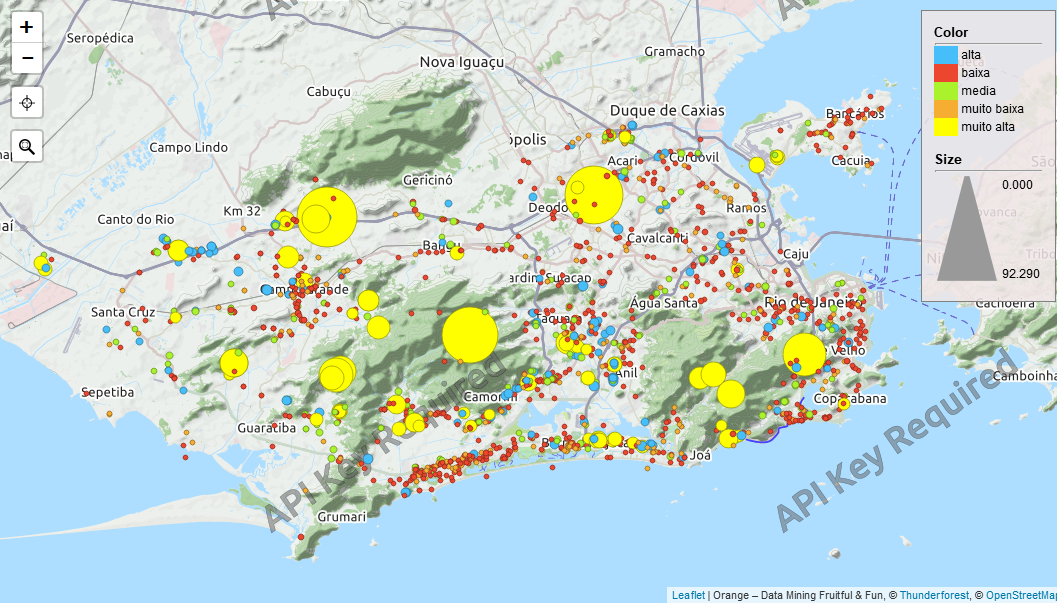
<div style="text-align: center">Figura 7: Produtividade de todos os poços (tamanho do ponto proporcional a produtividade)</div>

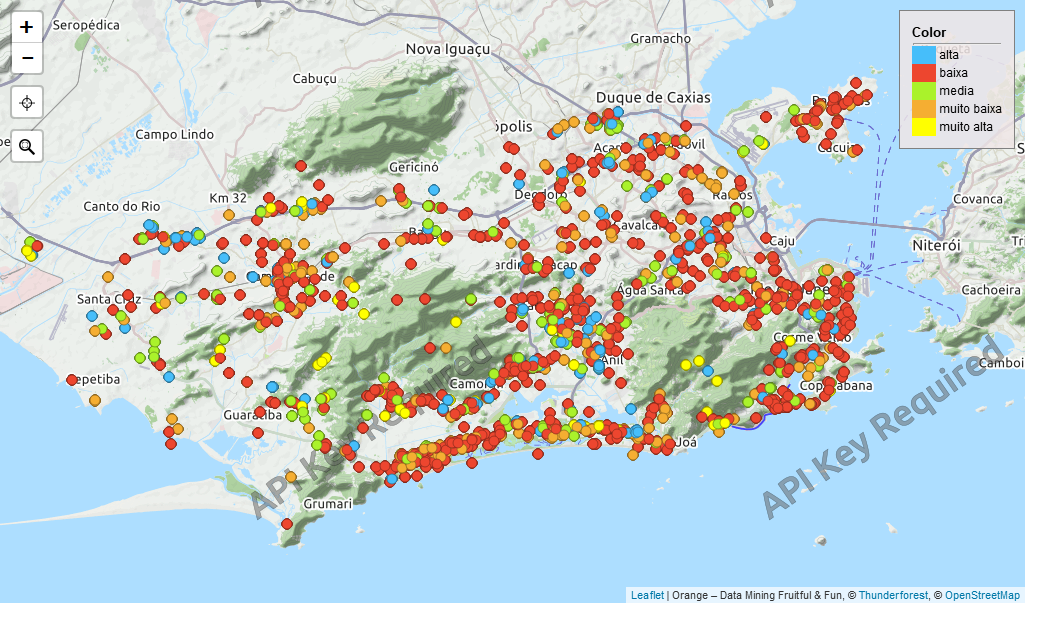
<div style="text-align: center">Figura 8: Produtividade de todos os poços (tamanho dos pontos iguais)</div>

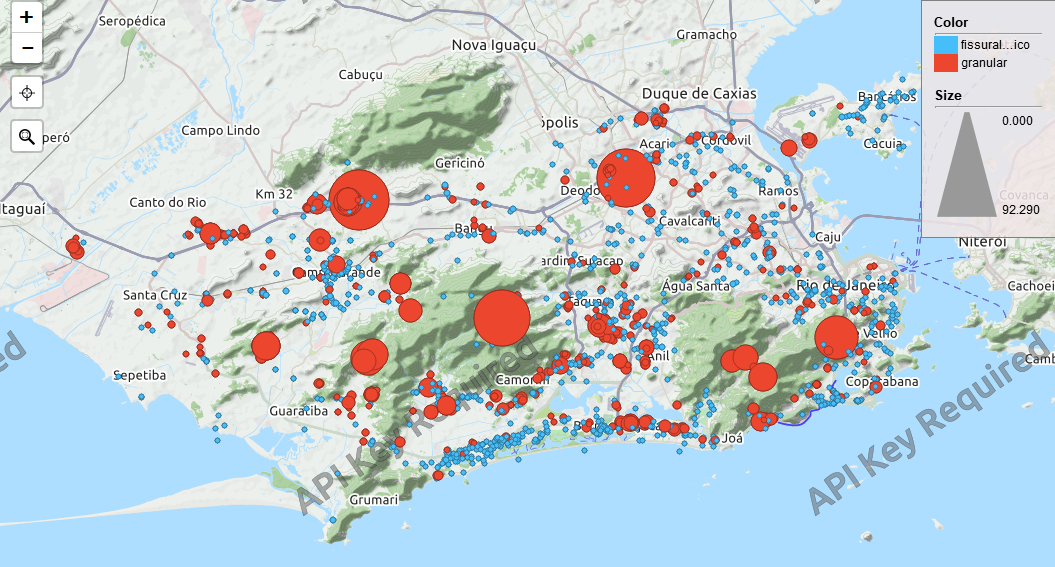
<div style="text-align: center">Figura 9: Classificação de todos os poços em tipos de aquíferos</div>

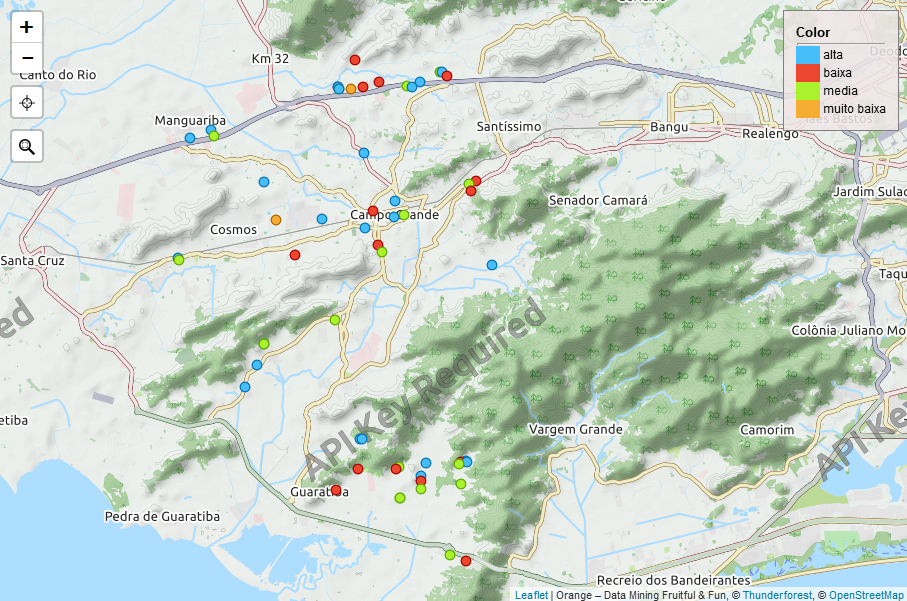
<div style="text-align: center">Figura 10: Produtividade dos 60 poços (vazão x profundidade)</div>

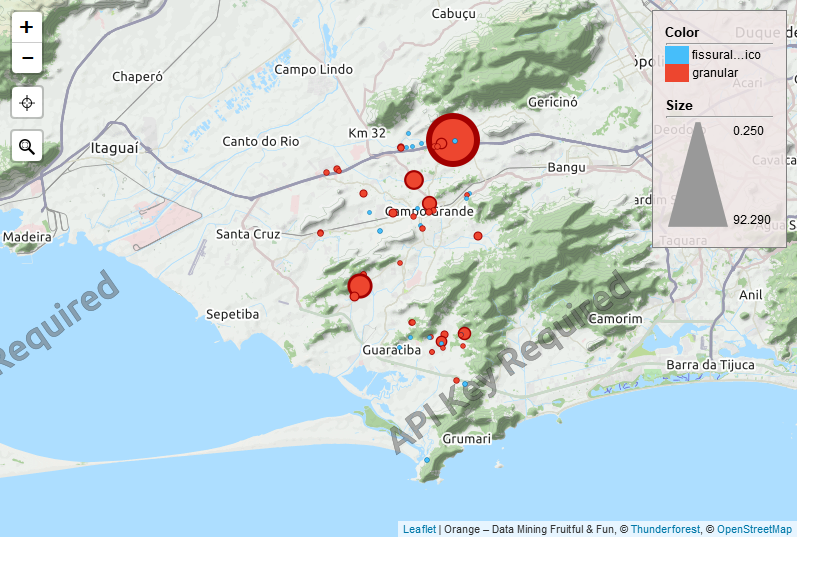
<div style="text-align: center">Figura 11: Classificação dos 60 poços em tipos de aquíferos</div>

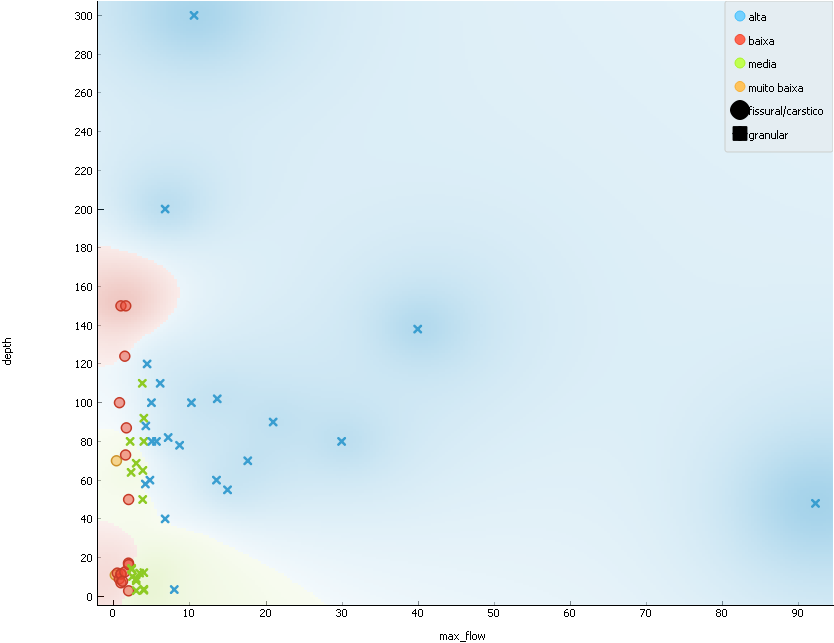
<div style="text-align: center">Figura 12: Scatter plot do 60 poços (vazão x profundidade), classificados quanto a produtividade e o tipo de aquífero</div>

### Considerações Finais

<div style="text-align: justify"> Analisando tanto os mapas de produtividade quanto os mapas dos aquíferos, percebe-se que, pela classificação da SEMA, os aquíferos encontram-se bastante distribuídos ao longo do relevo, mesmo as altas produtividades caracterísiticas de aquíferos granulares encontram-se também em relevo elevado, onde se esperava presença de aquíferos fissurais com baixa produtividade (rocha cristalina). O scatter plot produzido no orange (Figura 12), mostra que os valores de baixa produtividade também encontram-se em profundidade rasas, corroborando para o primeiro scatter plot produzido no excel. Além disso, a Figura 12 mostra que, embora não haja uma correlação significativa entre a vazão e a profundidade, parece que as mais altas vazões encontram-se em poços de grande profundidade. Para tentar explicar essa obsevação seria necessário uma validação com dados geológicos. Entretanto, a aplicação de um algoritmo como o SOM (Self Organizing Map), pode tentar agrupar esses valores pela sua distancia e ajudar a elucidar melhor essa questão.</div>